In [2]:
def modify(listt):
    string = listt[0]
    stringlist = string.split("[ ")
    stringlist.pop(0)
    modified = stringlist[0]
    listt.pop(0)
    listt.insert(0,modified)

In [3]:
# Reading the files
def motiffetch(location):
    import pandas as pd

    pssm = open(location,"r")
    lines = pssm.readlines()
    motifdict = {}
    motif = 0
    motiflist = []
    for line in lines:
        if line[0] == "A":
            motiflist = []
            motif += 1
            linelist = line.split("\t")
            linelist.remove("A")
            linelist.remove("]\n")
            modify(linelist)
            motiflist.append(linelist)
        if line[0] == "G" or line[0] == "C":
            linelist = line.split("\t")
            if "G" in linelist:
                linelist.remove("G")
            if "C" in linelist:
                linelist.remove("C")
            linelist.remove("]\n")
            modify(linelist)
            motiflist.append(linelist)
        if line[0] == "T":
            linelist = line.split("\t")
            motiflist.append(linelist)
            linelist.remove("T")
            linelist.remove("]\n")
            modify(linelist)
            motifdict[motif] = motiflist
    return motifdict

In [4]:
import random

def run(dic,index,iterations):
    runlist = []
    values = dic[index]
    width = len(values[0])
    characters = ["A","C","G","T"]
    for n in range(iterations):
        letters = []
        for i in range(width):
            weights = []
            for j in range(4):
                weight = float(values[j][i])
                weights.append(weight)
            element = random.choices(characters,weights,k=1)
            letter = "".join(element)
            letters.append(letter)
        word = "".join(letters)
        runlist.append(word)
    return runlist

In [5]:
def reverser(runlist):
    backlist = []
    for i in runlist:
        flipped = i[::-1]
        characters = list(flipped)
        for j in range(len(characters)):
            if characters[j] == "A":
                characters[j] = "T"
                continue
            if characters[j] == "T":
                characters[j] = "A"
                continue
            if characters[j] == "G":
                characters[j] ="C"
                continue
            if characters[j] == "C":
                characters[j] = "G"
                continue
        compliment = "".join(characters)
        backlist.append(compliment)
    return backlist
        

In [6]:
def motifcompare(motif1,motif2,b):
    runlista = run(motif1[0],motif1[1],motif1[2])
    runlistb = run(motif2[0],motif2[1],motif2[2])
    if b == -1:
        runlistb = reverser(runlistb)
    if b == 0:
        None
    scorelist = []
    for i in range(len(runlista)):
        for j in range(len(runlista)):
                if runlista[0] > runlistb[0]:
                    word2 = runlista[i]
                    word1 = runlistb[j]
                else:
                    word2 = runlistb[j]
                    word1 = runlista[i]
                len1 = len(word1)
                len2 = len(word2)
                scoretracker = []
                checkindex = len2 - len1
                for m in range(checkindex+1):
                    w2 = word2[m:m+len1]
                    if word1 == w2:
                        scoretracker.append(len1)
                        break
                    streakcount = 0
                    matchcount = 0
                    for k in range(len1):
                        if word1[k] == word2[k]:
                            if k != 0:
                                if word1[k-1] == w2[k-1]:
                                    streakcount +=1
                                else:
                                    streakcount =1
                            matchcount +=1
                    if streakcount == matchcount or streakcount > matchcount:
                        scoretracker.append(streakcount)
                    else:
                        scoretracker.append(matchcount)
                if scoretracker == []:
                    maxscore = 0
                else:
                    maxscore = max(scoretracker)
                scorelist.append(maxscore)
    value = max(scorelist)/len1
    return value

In [7]:
def motifmatch(loc1,loc2):
    type1 = motiffetch(loc1)
    type2 = motiffetch(loc2)
    ranklist = []
    for i in range(1,len(type1.keys())+1):
        marklist = []
        matchlist = []
        for j in range(1,len(type2.keys())+1):
            motif1 = [type1,i,1000]
            motif2 = [type2,j,1000]
            mark = motifcompare(motif1,motif2,0)
            revmark = motifcompare(motif1,motif2,-1)
            if mark > revmark:
                marklist.append(mark)
            else:
                marklist.append(revmark)
        self1 = motifcompare(motif1,motif1,1)
        self2 = motifcompare(motif2,motif2,1)
        normlist = []
        if self1 > self2:
            cutoff = 0.9 * self2
            for z in marklist:
                normlist.append(z/self2)
        else:
            cutoff = 0.9 * self1
            for z in marklist:
                normlist.append(z/self1)
        for k in range(0,len(marklist)):
            if marklist[k] > cutoff:
                matchlist.append(i)
                matchlist.append(k+1)
        ranklist.append(matchlist)
    return normlist
    

In [8]:
def cellmate():
    import matplotlib.pyplot as plt
    dic = {}
    for i in [1,4,5,6,7]:
        location1 = "/home/sreedev/Downloads/Data/pssm" + str(i) + ".txt"
        for j in [1,4,5,6,7]:
            if i !=j :
                location2 = "/home/sreedev/Downloads/Data/pssm" + str(j) + ".txt"
                dic[i] = motifmatch(location1,location2)
    values = list(dic.values())
    plt.clf()
    boxplot = plt.boxplot(values, notch = True, whis = [5,95],sym = '')
    for whisker in boxplot['whiskers']:
        whisker.set(color='k', linestyle='-')

    for flier in boxplot['fliers']:
        flier.set(marker='', color='k')
    plt.showfig()

In [9]:
loc1 = "/home/sreedev/Downloads/Data/pssm1.txt"
loc2 = "/home/sreedev/Downloads/Data/pssm4.txt"
#motifmatch(loc1,loc2)

In [10]:
def exact(motif1,motif2,b):
    runlista = run(motif1[0],motif1[1],motif1[2])
    runlistb = run(motif2[0],motif2[1],motif2[2])
    if b == -1:
        runlistb = reverser(runlistb)
    if b == 0:
        None
    matches = 0
    for i in range(len(runlista)):
        for j in range(len(runlista)):
                if runlista[0] > runlistb[0]:
                    word2 = runlista[i]
                    word1 = runlistb[j]
                else:
                    word2 = runlistb[j]
                    word1 = runlista[i]
                if word1 in word2:
                    matches +=1
    score = matches
    return score
    

In [22]:
loc1 = "/home/sreedev/Downloads/Data/pssm1.txt"
loc2 = "/home/sreedev/Downloads/Data/pssm4.txt"
dp = motiffetch(loc1)
th1 = motiffetch(loc1)
motif1 = [dp,3,10000]
motif2 = [th1,5,10000]
print(exact(motif1,motif2,0))
print(exact(motif1,motif1,0))
print(exact(motif2,motif2,0))

47
4888
0


In [22]:
def dfmaker(loc):
    import pandas as pd
    dp = motiffetch(loc)
    dfs = []
    for i in dp.keys():
        lists = dp[i]
        df = pd.DataFrame(lists)
        dfs.append(df)
    for j in dfs:
        for k in j.columns:
            column = j[k].astype(float)
            total = (column).sum()
            column = (column)/total
            j[k] = column
    return dfs
            

In [23]:
def euclid(df1,df2):
    import numpy as np
    if len(df1.columns) > len(df2.columns):
        big = df1
        small = df2
    else:
        big = df2
        small = df1
    scorelist = []
    difference = len(big.columns) - len(small.columns)
    normalizer = len(small.columns) * 4
    for j in range(difference+1):
        last = len(big.columns)
        start = len(big.columns) - difference + j
        remove1 = np.arange(0,j,1)
        remove2 = np.arange(start,last,1)
        remove = list(set(remove1).union(set(remove2)))
        newbig = big.drop(columns = remove)
        diffdf = (newbig - small).abs()
        total = 0
        for i in diffdf.columns:
            ltotal = diffdf[i].sum()
            total += ltotal
        score = total/normalizer
        scorelist.append(score)
    return max(scorelist)





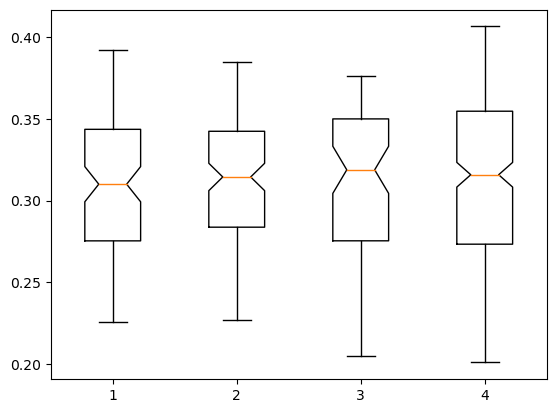

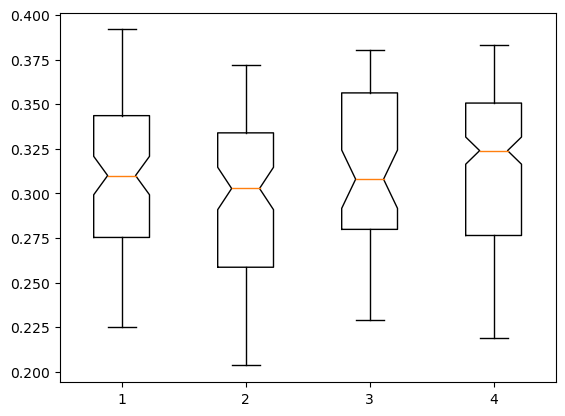

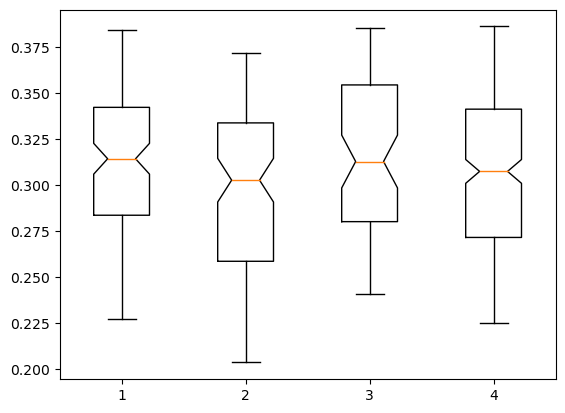

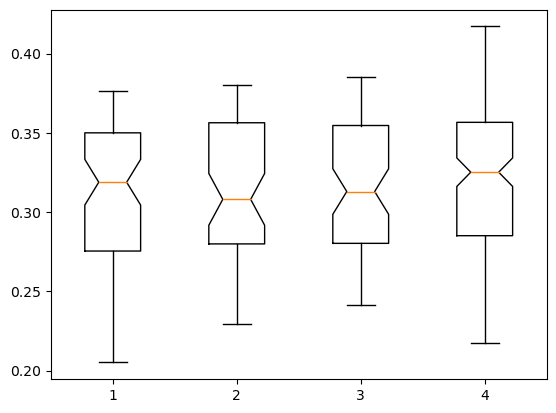

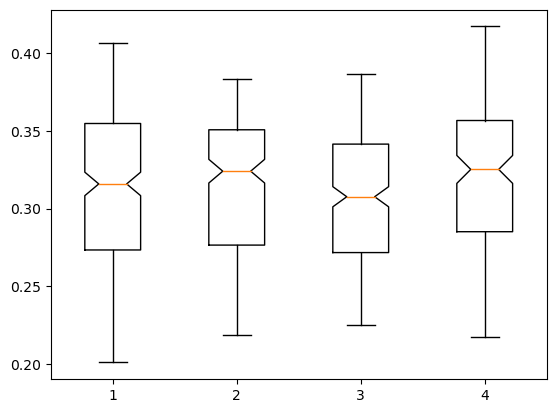

In [40]:
def cellmate2():
    import matplotlib.pyplot as plt
    dic = {}
    for i in [1,4,5,6,7]:
        location1 = "/home/sreedev/Downloads/Data/pssm" + str(i) + ".txt"
        vlist = []
        for j in [1,4,5,6,7]:
            if i !=j :
                location2 = "/home/sreedev/Downloads/Data/pssm" + str(j) + ".txt"
                df1 = dfmaker(location1)
                df2 = dfmaker(location2)
                scorelist = []
                for k in df1:
                    for l in df2:
                        scorelist.append(euclid(k,l))
                vlist.append(scorelist)
        dic[i] = vlist
    values = list(dic.values())
    for u in values:
        boxplot = plt.boxplot(u, notch = True, whis = [5,95],sym = '')
        for whisker in boxplot['whiskers']:
            whisker.set(color='k', linestyle='-')

        for flier in boxplot['fliers']:
            flier.set(marker='', color='k')
        plt.show()

cellmate2()

In [34]:
for i in [1,2,3,4,5,6]:
    print(i)

1
2
3
4
5
6


In [12]:
def aligner(df1,df2):
    maxi = 0
    maxj = 0
    for i in df1.columns:
        mindiffsum = 35
        for j in df2.columns:
            diff = (df1[i] -df2[j]).abs()
            diffsum = diff.sum()
            if diffsum < mindiffsum:
                mindiffsum = diffsum
                maxi = i
                maxj = j
    return [maxi,maxj]

In [59]:
def euclid2(df1,df2):
    import numpy as np
    anchors = aligner(df1,df2)
    max1 = anchors[0]
    max2 = anchors[1]
    if max2 > max1 :
        up = df2
        down = df1
        maxup = max2
        maxdown = max1
        leftcut = max2 - max1
    else:
        up = df1
        down = df2
        maxdown = max2
        maxup = max1
        leftcut = max1 - max2
    updropleft = np.arange(0,leftcut,1)
    if len(up.columns) > len(down.columns):
        rightcut = maxup + len(down.columns) - maxdown
        updropright = np.arange(rightcut,len(up.columns),1)
        updroplist = list(set(updropright).union(set(updropleft)))
        newup = up.drop(columns = updroplist)
        newdown = down
    else:
        rightcut = maxdown + len(up.columns) - maxup
        downdrop = np.arange(rightcut,len(down.columns),1)
        newdown = down.drop(columns = downdrop)
        newup = up.drop(columns = updropleft)

    diffdf = (newup - newdown).abs()
    count = 0
    if len(newup) > 3 :
        for k in diffdf.columns:
            values = diffdf[k].tolist()
            for l in range(len(values)):
                if values[l] > 0.05:
                    count +=1
        if count < 5:
            return True


In [48]:
loc1 = "/home/sreedev/Downloads/Data/pssms2.txt"
loc2 = "/home/sreedev/Downloads/Data/pssms8.txt"
dfs1 = dfmaker(loc1)
dfs2 = dfmaker(loc1)
euclid2(dfs1[0],dfs2[0])

True

In [60]:

def shaadi(loc1,loc2):
    dfs1 = dfmaker(loc1)
    dfs2 = dfmaker(loc2)
    matchlist = []
    for i in range(len(dfs1)):
        for j in range(len(dfs2)):
            if euclid2(dfs1[i],dfs2[j]) == True:
                matchlist.append([i+1,j+1])
    return matchlist
            
loc1 = "/home/sreedev/Downloads/Data/pssms2.txt"
loc2 = "/home/sreedev/Downloads/Data/pssms8.txt"
shaadi(loc1,loc2)

[[1, 3],
 [1, 4],
 [1, 6],
 [1, 7],
 [2, 4],
 [2, 7],
 [3, 3],
 [3, 4],
 [3, 5],
 [4, 3],
 [4, 6],
 [5, 4],
 [5, 5],
 [5, 7]]

In [27]:
def bestmate(celltype):
    loc = "/home/sreedev/Downloads/Data/pssm" + str(celltype) + ".txt"
    scorelist = []
    for i in range(1,16):
        if i != 14:
            friendloc = "/home/sreedev/Downloads/Data/pssm" + str(i) + ".txt"
            score = len(shaadi(loc,friendloc))
            scorelist.append(score)
    return scorelist

bestmate(1)

[11, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0]

In [28]:
import pandas as pd
dic = {}
for i in range(1,15):
    if i !=14:
        dic[i] = bestmate(i)
df = pd.DataFrame(dic)
df

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,11,0,0,0,0,0,2,1,0,0,0,0,0
1,0,13,1,0,0,0,0,1,0,0,0,0,1
2,0,1,10,0,0,0,0,0,0,0,0,0,0
3,0,0,0,9,1,0,0,0,0,1,0,0,0
4,0,0,0,1,11,0,0,1,0,0,0,0,0
5,0,0,0,0,0,6,0,0,1,0,0,0,0
6,2,0,0,0,0,0,26,0,0,0,0,1,0
7,1,1,0,0,1,0,0,15,1,0,0,0,1
8,0,0,0,0,0,1,0,1,5,0,0,0,0
9,0,0,0,1,0,0,0,0,0,14,0,2,0


In [1]:
!jt -t gruvboxd -T -N -kl